In [1]:
%matplotlib widget
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import NA_N9916A
import time

In [2]:
# 8.5718125 GHz 
# -26 dB
# 10 MHz di span
###############################
                            
ip          = '192.168.40.10'   
mode        = 'NA'              
s_par       = 'S21'       
f_center = 8.5718125e9
f_span = 20e6   
n_pts = 1000
hdf5_file   = '2024-04-18.hdf5'            
                            
###############################


vna = NA_N9916A.N9916A(ip)

Connection successful!


Span: 20000000.0
Num pts: 1000
Num pts: 2000
Num pts: 3000
Num pts: 4000


KeyboardInterrupt: 

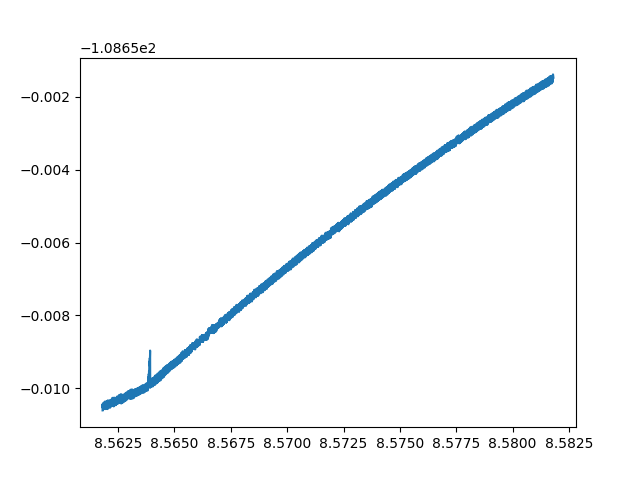

In [3]:
vna.reset()
vna.clear()
vna.set_mode(mode)

if mode == 'NA': 
    vna.set_NA_par(s_par)
    name_group = f'{mode}_{s_par}'
elif mode == 'SA':
    name_group = mode
vna.set_freq_center(f_center)
vna.set_freq_bandwidth(1e3)

SPAN = np.arange(20e6, 9e6, -1e6)
NUM = np.arange(1000, 6000, 1000)

# SPAN = [20e6]
# NUM = [1000]
plt.show()
for i in SPAN:
    print('Span:', i)
    for j in NUM:

        vna.set_num_pts(j)
        vna.set_freq_span(i)
        sweep = vna.get_data()
        sweep['Num pts'] = j
        sweep['Span'] = i
        vna.w_hdf(hdf5_file, name_group, sweep)
        print('Num pts:', j)

        f, I, Q, a, b = sweep.values()
        amp = 10*np.log10(I**2 + Q**2) # amplitude

        plt.clf()
        plt.plot(f, amp)
        plt.draw()
        time.sleep(5)

In [4]:
vna.reset()
vna.clear()
vna.set_mode(mode)

if mode == 'NA': 
    vna.set_NA_par(s_par)
    name_group = f'{mode}_{s_par}'
elif mode == 'SA':
    name_group = mode


vna.set_freq_center(f_center)

vna.set_freq_bandwidth(1e3)

In [65]:
n_pts = 6000
f_span = 5e6

vna.set_num_pts(n_pts)
vna.set_freq_span(f_span)

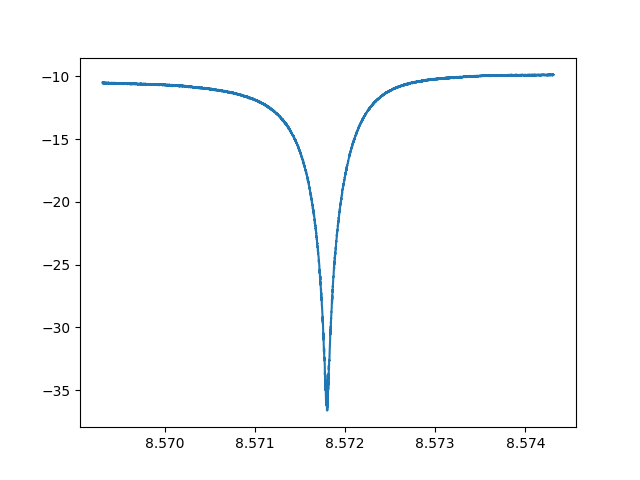

In [66]:
sweep = vna.get_data()
sweep['Num pts'] = n_pts
sweep['Span'] = f_span
vna.w_hdf(hdf5_file, name_group, sweep)
# print(sweep)
f, I, Q, a, b = sweep.values()
amp = 10*np.log10(I**2 + Q**2) # amplitude

plt.clf()
plt.plot(f, amp)
plt.show()

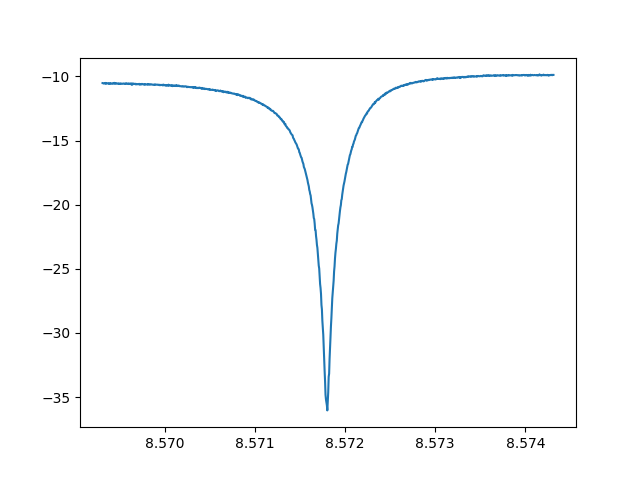

In [72]:
I_mean = np.array([])
Q_mean = np.array([])
f_mean = np.array([])


# potenza inviata = -15 dmb


saved_sweep = vna.r_hdf_data(hdf5_file, 'NA_S21', 20)
# print(saved_sweep)
I, a, Q, b, f = saved_sweep.values()


amp = 10*np.log10(I**2 + Q**2) # amplitude

plt.clf()
plt.plot(f, amp)
plt.show()

# Fitting